<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_5_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 5: Image Classification**



## **📝 Description:**

Train a convolutional neural network (CNN) to classify images into different categories (e.g., cats vs. dogs). Use data augmentation and transfer learning to improve model performance. Visualize the classification results and model accuracy.

## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.

##  **🧪 I’ll experiment with:**

**1. Fine-tuning the pretrained MobileNetV2 model**
- Unfreeze some layers of MobileNetV2 to fine-tune the model for better performance on the flower classification task.

**2. Applying data augmentation**
- Use techniques like rotation, flipping, zooming, and shifting to artificially expand the training dataset and improve the model's generalization.

**3. Learning rate scheduling with callbacks**
- Implement learning rate scheduling to adjust the learning rate during training, helping the model converge more efficiently.

**4. Model checkpointing and early stopping**
- Set up callbacks for saving the best model during training and stopping early if the model performance stops improving, to prevent overfitting.

**5. Increasing the number of training epochs (optional)**
- Experiment with longer training periods to see if additional epochs improve accuracy, especially when using fine-tuning and learning rate scheduling.

**6. Transfer learning with MobileNetV2 pretrained on ImageNet**
- Leverage the power of a pretrained model on ImageNet to improve classification performance on flower images with less training data.

#  **1. 🧠 Define the Problem**

**Objective:** Classify flower images into different species using deep learning.

**Type:** Multi-class image classification.

**Challenge:** Improve accuracy using transfer learning, data augmentation, and visualize model performance.

## **Data Source: [Colored Flowers in Bangladesh](https://www.kaggle.com/datasets/jocelyndumlao/colored-flowers-in-bangladesh/data)**

# **2. 🗂️Collect and Prepare Data**
- Download the files from kagglehub dataset

## **2.1.📥 Download the Files**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/colored-flowers-in-bangladesh")

print("Path to dataset files:", path)

100%|██████████| 2.71G/2.71G [00:34<00:00, 85.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1


In [2]:
import os

# Set the base dataset path
dataset_path = '/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1'

# Walk through all directories
print("Directory structure:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}- {os.path.basename(root)}/")


Directory structure:
- 1/
    - ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/
        - ColoredFlowersBD/
            - ColoredFlowersBD/
                - Kagoj Phul/
                    - Bulk/
                    - Single/
                - Jaba/
                    - Bulk/
                    - Single/
                - Rangan/
                    - Bulk/
                    - Single/
                - Zinnia/
                    - Bulk/
                    - Single/
                - Sandhyamani/
                    - Bulk/
                    - Single/
                - Radhachura/
                    - Bulk/
                    - Single/
                - Salvia/
                    - Bulk/
                    - Single/
                - Surjomukhi/
                    - Bulk/
                    - Single/
                - Golap/
                    - Bulk/
     

In [3]:
import os

base_path = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1"

for root, dirs, files in os.walk(base_path):
    print(root)


/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehe

In [ ]:
#source_root = '/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD/ColoredFlowersBD'


In [4]:
source_root = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD"


In [5]:
# Automatically find the correct ColoredFlowersBD path
for root, dirs, files in os.walk(base_path):
    for d in dirs:
        if d == "ColoredFlowersBD":
            source_root = os.path.join(root, d)
            print("Correct source path found:", source_root)
            break


Correct source path found: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD
Correct source path found: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD


In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# ✅ Your verified source directory
source_root = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD"

# ✅ Target organized directory
target_root = "/content/dataset"
os.makedirs(target_root, exist_ok=True)

# 🔁 Process each flower class
for class_name in os.listdir(source_root):
    class_path = os.path.join(source_root, class_name)
    if not os.path.isdir(class_path):
        continue

    # Collect all image paths from both Bulk and Single folders
    image_paths = []
    for subfolder in ["Bulk", "Single"]:
        sub_path = os.path.join(class_path, subfolder)
        if os.path.isdir(sub_path):
            image_paths.extend([
                os.path.join(sub_path, fname)
                for fname in os.listdir(sub_path)
                if fname.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])

    if len(image_paths) < 10:
        print(f"Skipping {class_name} — too few images.")
        continue

    # Split into train and val sets
    train_imgs, val_imgs = train_test_split(image_paths, test_size=0.2, random_state=42)

    for split, split_imgs in [('train', train_imgs), ('val', val_imgs)]:
        split_dir = os.path.join(target_root, split, class_name)
        os.makedirs(split_dir, exist_ok=True)
        for img_path in split_imgs:
            shutil.copy(img_path, os.path.join(split_dir, os.path.basename(img_path)))

print("✅ Dataset has been split and organized into train/val folders.")


✅ Dataset has been split and organized into train/val folders.


## **2.2. load the data using TensorFlow’s**

We already downloaded and split the dataset into train/ and val/ folders with subfolders per class. Now we load the data using TensorFlow’s ImageDataGenerator.

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 6332 images belonging to 13 classes.
Found 1595 images belonging to 13 classes.


# **📊 3. Exploratory Data Analysis (EDA)**

We’ll check class distributions and sample images.

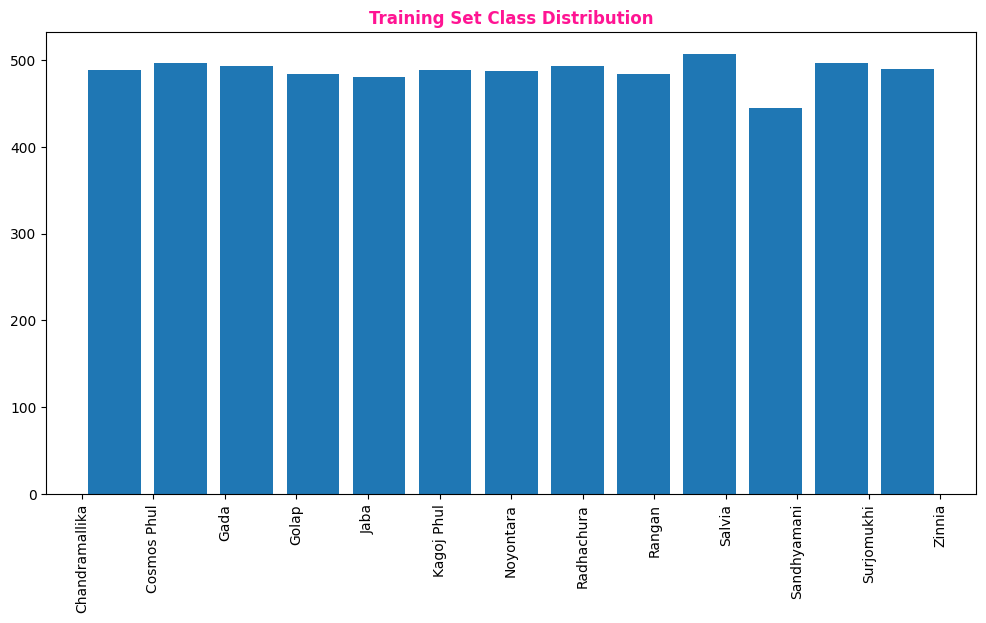

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Class names and counts
class_counts = train_generator.classes
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(12,6))
plt.hist(class_counts, bins=len(class_names), rwidth=0.8)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.title("Training Set Class Distribution",fontsize = 12, fontweight = 'bold', color = 'deeppink')
plt.show()


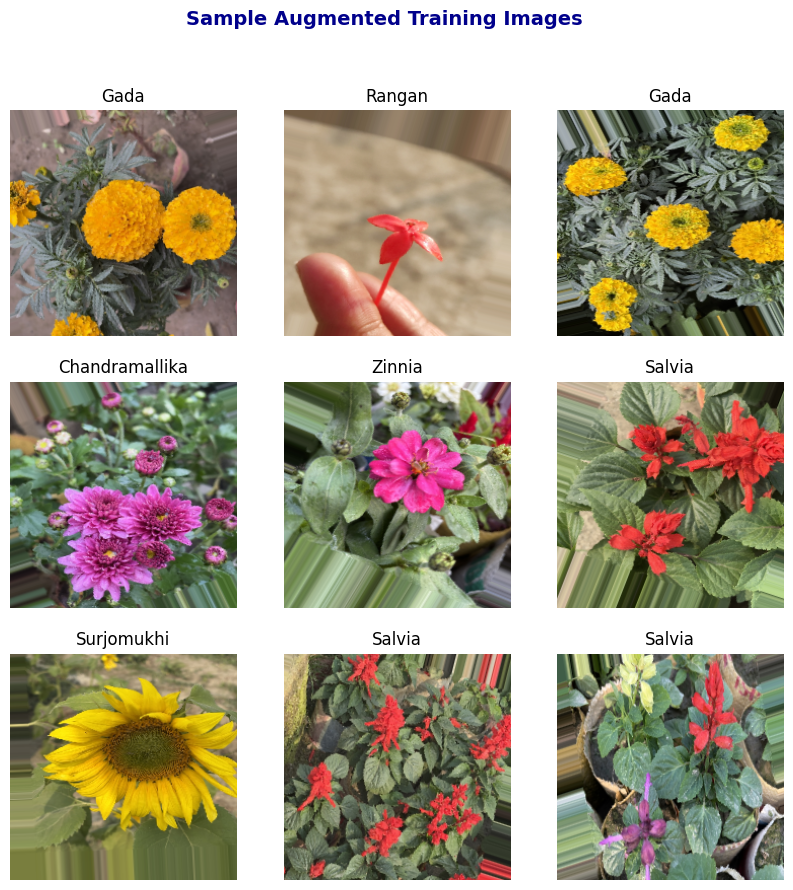

In [9]:
x, y = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.title(class_names[np.argmax(y[i])])
    plt.axis('off')
plt.suptitle("Sample Augmented Training Images", fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.show()


# **🧪 4. Feature Engineering**

We're using pretrained features from MobileNetV2, so no manual feature engineering is needed.

# **🔀 5. Split the Data**
Already done: You have 80% training and 20% validation split.

# **🤖 6. Choose a Model**
We’ll use Transfer Learning with MobileNetV2 (pretrained on ImageNet).

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,274,637 (8.68 MB)

 Trainable params: 16,653 (65.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# **🏋️ 7. Train the Model**

In [11]:
epochs = 6

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.1297 - loss: 2.6977 - val_accuracy: 0.5304 - val_loss: 1.6930
Epoch 2/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.4738 - loss: 1.6868 - val_accuracy: 0.7279 - val_loss: 1.1419
Epoch 3/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.6485 - loss: 1.2211 - val_accuracy: 0.7887 - val_loss: 0.8821
Epoch 4/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.7628 - loss: 0.9243 - val_accuracy: 0.8357 - val_loss: 0.7144
Epoch 5/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.8004 - loss: 0.7663 - val_accuracy: 0.8671 - val_loss: 0.6006
Epoch 6/6
198/198 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.8321 - loss: 0.6574 - val_accuracy: 0.8865 - val_loss: 0.5250


# **📈 8. Evaluate the Model**

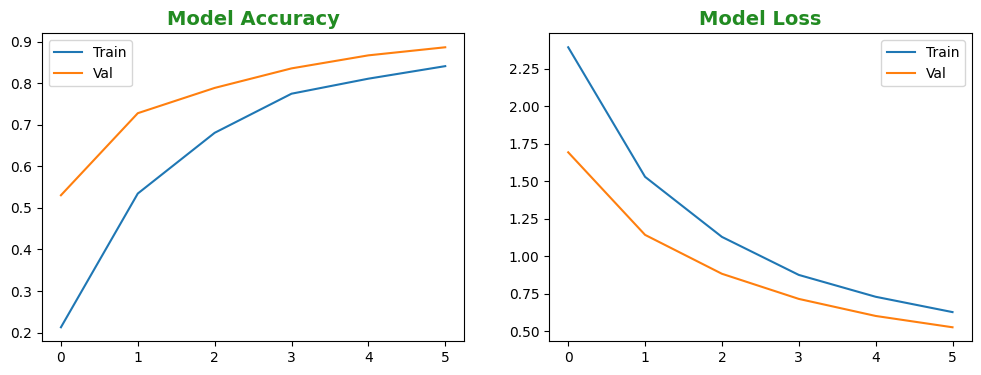

In [12]:
import matplotlib.pyplot as plt

# Accuracy and loss plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.legend()
plt.show()


## **Evaluate metrics:**

In [13]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2%}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8750 - loss: 0.5414
Validation Accuracy: 88.65%


# **🔧 9. Improve the Model**
Ideas to try:

- Unfreeze the base model (base_model.trainable = True) and fine-tune it.
- Use a more powerful backbone (e.g., EfficientNet).
- Apply more aggressive data augmentation.
- Increase training epochs with callbacks like EarlyStopping.

## ➡️ See these ideas implemented in the Improve the Model notebook.


# **🚀 10. Deploy the Model (Optional)**

Save the model for deployment:

In [14]:
model.save("flower_classifier.h5")


To deploy:

- Use Flask, Streamlit, or Gradio to build an interface.

- Load this model and allow users to upload images for prediction.